# <font color =Green>EDA OF FORBES BILLIONAIRES</font>


In this project,I will conduct Exploratory data analysis of the recently released list of world billionaires as listed on Forbes. 

## Step 1 : Libraries and packages 
 Import the neccessary libraries. In this case we will use Numpy, Pandas and Matplotlib libraries. 
 
## Step 2 : Data Loading

Load the data using read_csv method in Pandas

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
Billions = pd.read_csv('forbes_2022_billionaires.csv')

 
 ###  Step 3: Data Preprocessing 
 
 
 Exploring the data attributes

In [14]:
Billions.head()

,rank,personName,age,finalWorth,year,month,category,source,country,state,...,organization,selfMade,gender,birthDate,title,philanthropyScore,residenceMsa,numberOfSiblings,bio,about
0,1,Elon Musk,50.0,219000.0,2022,4,Automotive,"Tesla, SpaceX",United States,Texas,...,Tesla,True,M,1971-06-28,CEO,1.0,NaN,NaN,Elon Musk is working to revolutionize transpor...,Musk was accepted to a graduate program at Sta...
1,2,Jeff Bezos,58.0,171000.0,2022,4,Technology,Amazon,United States,Washington,...,Amazon,True,M,1964-01-12,Entrepreneur,1.0,"Seattle-Tacoma-Bellevue, WA",NaN,Jeff Bezos founded e-commerce giant Amazon in ...,"Growing up, Jeff Bezos worked summers on his g..."
2,3,Bernard Arnault & family,73.0,158000.0,2022,4,Fashion & Retail,LVMH,France,NaN,...,LVMH Moët Hennessy Louis Vuitton,False,M,1949-03-05,Chairman and CEO,NaN,NaN,NaN,Bernard Arnault oversees the LVMH empire of so...,"Arnault apparently wooed his wife, Helene Merc..."
3,4,Bill Gates,66.0,129000.0,2022,4,Technology,Microsoft,United States,Washington,...,Bill & Melinda Gates Foundation,True,M,1955-10-28,Cofounder,4.0,"Seattle-Tacoma-Bellevue, WA",NaN,Bill Gates turned his fortune from software fi...,"When Gates was a kid, he spent so much time re..."
4,5,Warren Buffett,91.0,118000.0,2022,4,Finance & Investments,Berkshire Hathaway,United States,Nebraska,...,Berkshire Hathaway,True,M,1930-08-30,CEO,5.0,"Omaha, NE",NaN,"Known as the ""Oracle of Omaha,"" Warren Buffett...","Buffett still lives in the same Omaha, Nebrask..."


In [15]:
Billions.shape

(2668, 22)

In [16]:
Billions.dtypes

rank                      int64
personName               object
age                     float64
finalWorth              float64
year                      int64
month                     int64
category                 object
source                   object
country                  object
state                    object
city                     object
countryOfCitizenship     object
organization             object
selfMade                   bool
gender                   object
birthDate                object
title                    object
philanthropyScore       float64
residenceMsa             object
numberOfSiblings        float64
bio                      object
about                    object
dtype: object

### Step 4
The data has both numerical and categorical data, on this step I will be selecting the columns that will be required for analysis.

In [17]:
bns = Billions.loc[:,["rank", "personName", "age", "finalWorth", "category", "country", "gender"]]
bns.head()

,rank,personName,age,finalWorth,category,country,gender
0,1,Elon Musk,50.0,219000.0,Automotive,United States,M
1,2,Jeff Bezos,58.0,171000.0,Technology,United States,M
2,3,Bernard Arnault & family,73.0,158000.0,Fashion & Retail,France,M
3,4,Bill Gates,66.0,129000.0,Technology,United States,M
4,5,Warren Buffett,91.0,118000.0,Finance & Investments,United States,M


### Step 5

Since rank column consists of index column, we can convert it into the index column.

In [18]:
bns = bns.set_index("rank")
bns.head()

,personName,age,finalWorth,category,country,gender
rank,,,,,,
1,Elon Musk,50.0,219000.0,Automotive,United States,M
2,Jeff Bezos,58.0,171000.0,Technology,United States,M
3,Bernard Arnault & family,73.0,158000.0,Fashion & Retail,France,M
4,Bill Gates,66.0,129000.0,Technology,United States,M
5,Warren Buffett,91.0,118000.0,Finance & Investments,United States,M


### Step 6

Check for missing data and drop them so the data is clean

In [19]:
bns.isnull().sum()

personName     0
age           86
finalWorth     0
category       0
country       13
gender        16
dtype: int64

In [20]:
bns.dropna(inplace=True)

In [21]:
bns.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2568 entries, 1 to 2578
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   personName  2568 non-null   object 
 1   age         2568 non-null   float64
 2   finalWorth  2568 non-null   float64
 3   category    2568 non-null   object 
 4   country     2568 non-null   object 
 5   gender      2568 non-null   object 
dtypes: float64(2), object(4)
memory usage: 140.4+ KB


It can be noted that there is no missing data and the data has 2568 columns. 

### Data Analysis 


Since the data has been prepared, it is time to analyze the data and understand it better

In [22]:
bns["gender"].value_counts()

M    2282
F     286
Name: gender, dtype: int64

In [23]:
bns["gender"].value_counts(normalize=True)

M    0.888629
F    0.111371
Name: gender, dtype: float64

From the data above it can be seen that most Billionaires are Men with 89% of the individuals being Male. The rest are female with an underwhelming value of 11%. 

In [24]:
bns_gender = bns.groupby(["gender"])

In [25]:
bns_gender["age"].mean()

gender
F    62.937063
M    64.409290
Name: age, dtype: float64

As can be seen, the average age of men is 64, and the average age of women is 63. Let's draw a bar plot for the male and female averages. First, let me specify a seaborn theme.Then import the warning package to help avoid the warning message

In [26]:
import seaborn as sns
sns.set_theme()
sns.set(rc ={"figure.figsize": (12,8), "figure.dpi": 300})

In [27]:
import warnings 
warnings.filterwarnings("ignore")

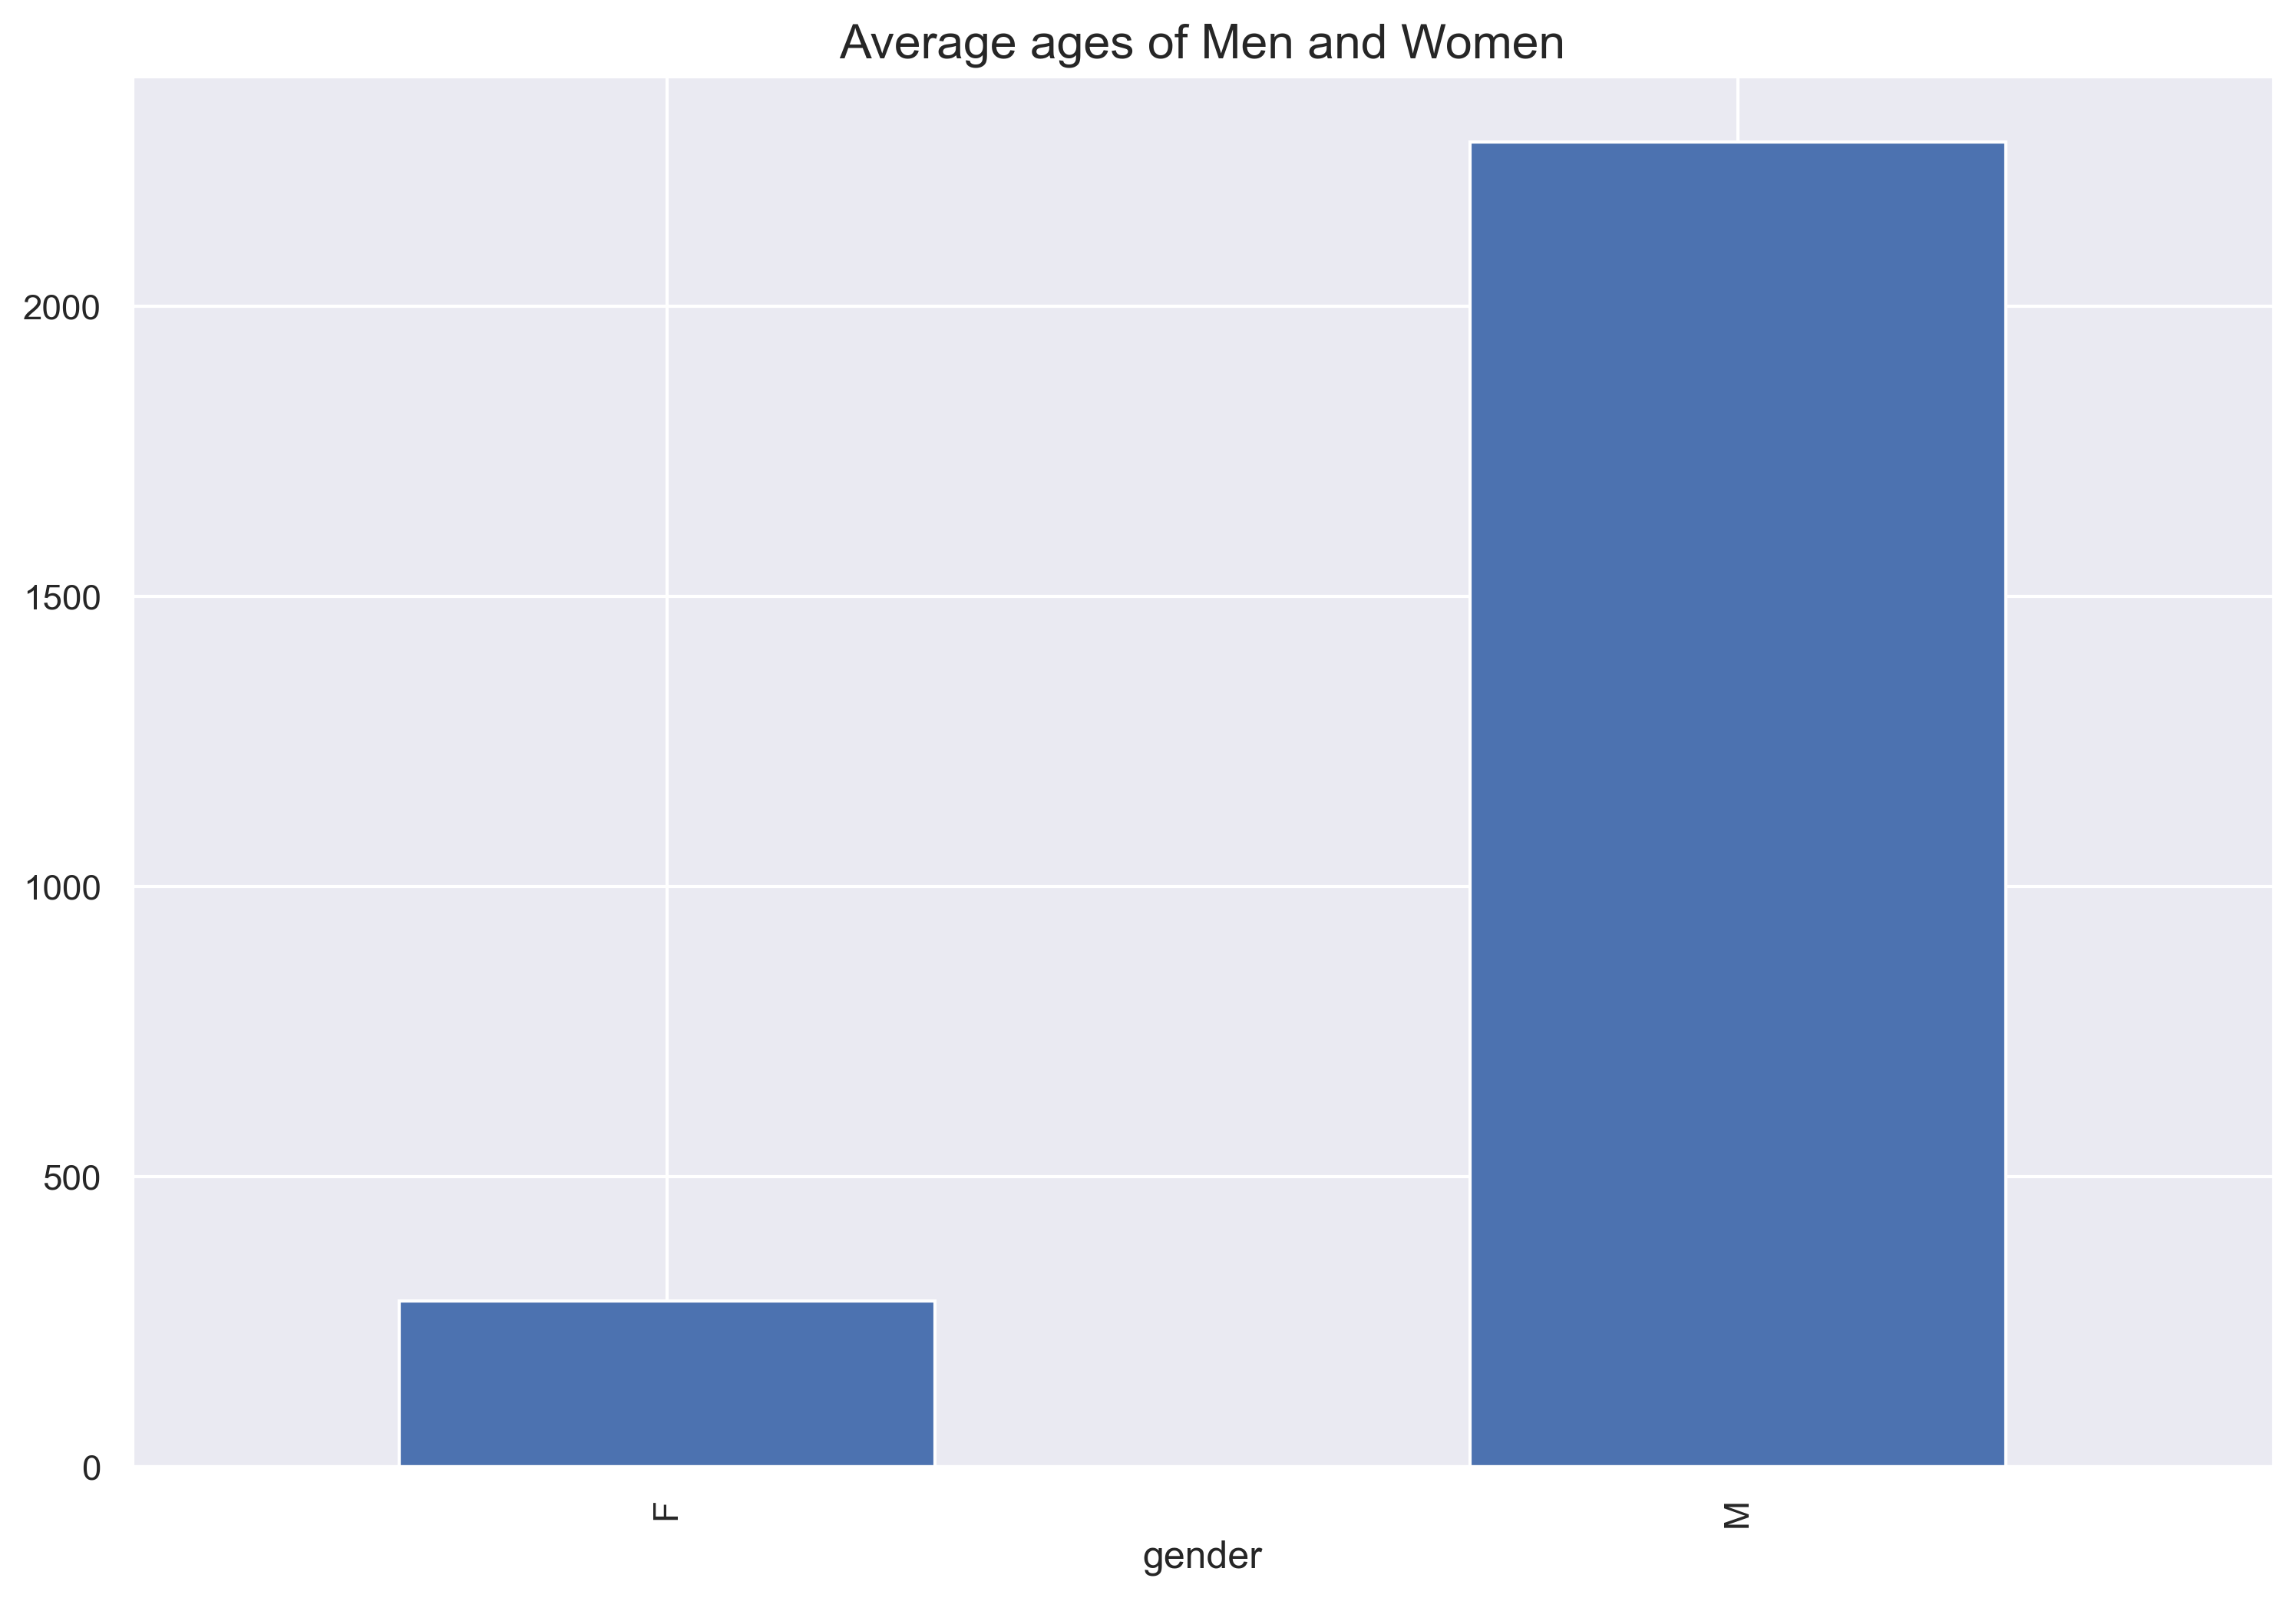

In [28]:
bns_gender.size().plot(kind="bar")
plt.title('Average ages of Men and Women', fontsize = 15)
plt.show()

### Top 10 richest in The World

To see the top I will plot a bar chart using seaborn

Text(0.5, 1.0, 'Top 10 richest')

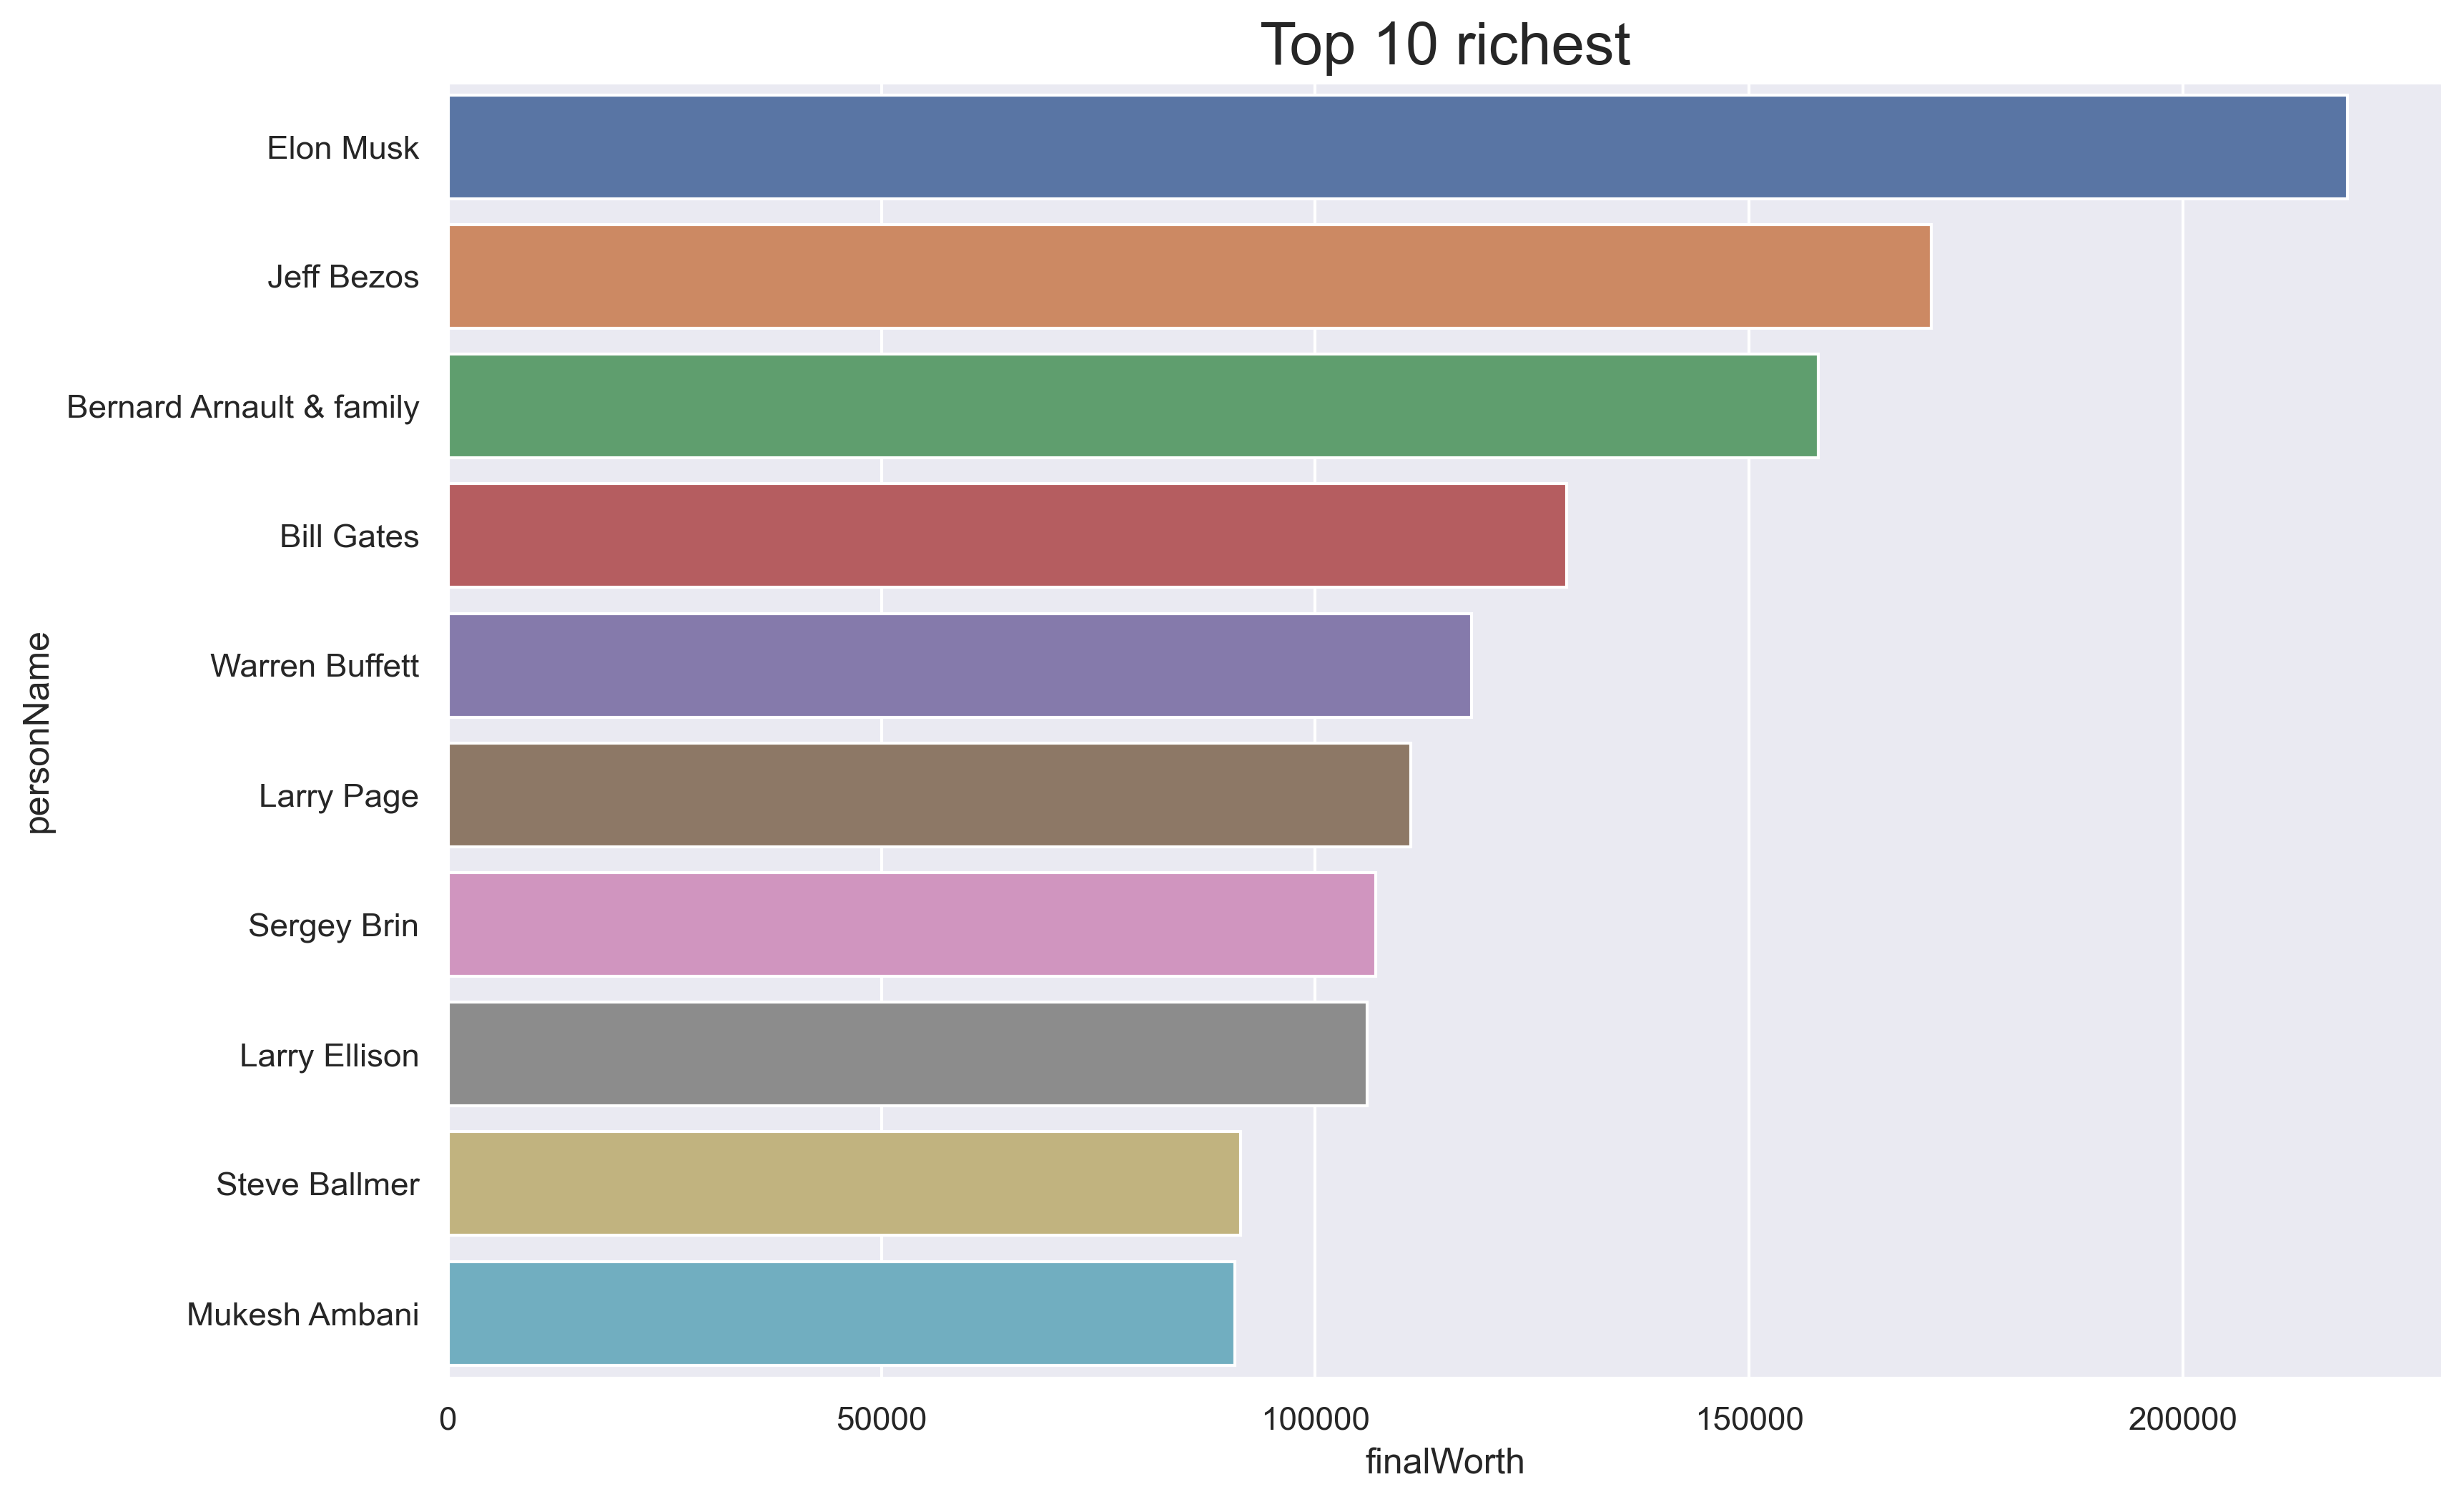

In [29]:
sns.barplot(y=bns["personName"][:10], x = bns["finalWorth"][:10])
plt.title('Top 10 richest', fontsize = 20)

### Top 10 countries

In this step we will look at the countries with the most number of billionaires

In [30]:
# Let's look at the number of unique countries in the data

len(bns["country"].unique())

73

Out of all the countries in the world it can be noted that there are only 73 countries represented in the list. We will the group the columns arccording to country using groupby method

In [31]:
bns_country =  bns.groupby("country")

Let's calculate the number of billionaires by country with the size method, and then sort the countries with the most billionaires with sort_values and transform this data into a dataframe with the DataFrame method.

In [32]:
bns_country_count = pd.DataFrame(
    bns_country.size().sort_values(ascending=False), columns=["Count"])
bns_country_count.head()

,Count
country,
United States,742
China,546
India,154
Germany,94
United Kingdom,81


Text(0.5, 1.0, 'Top 10 countries')

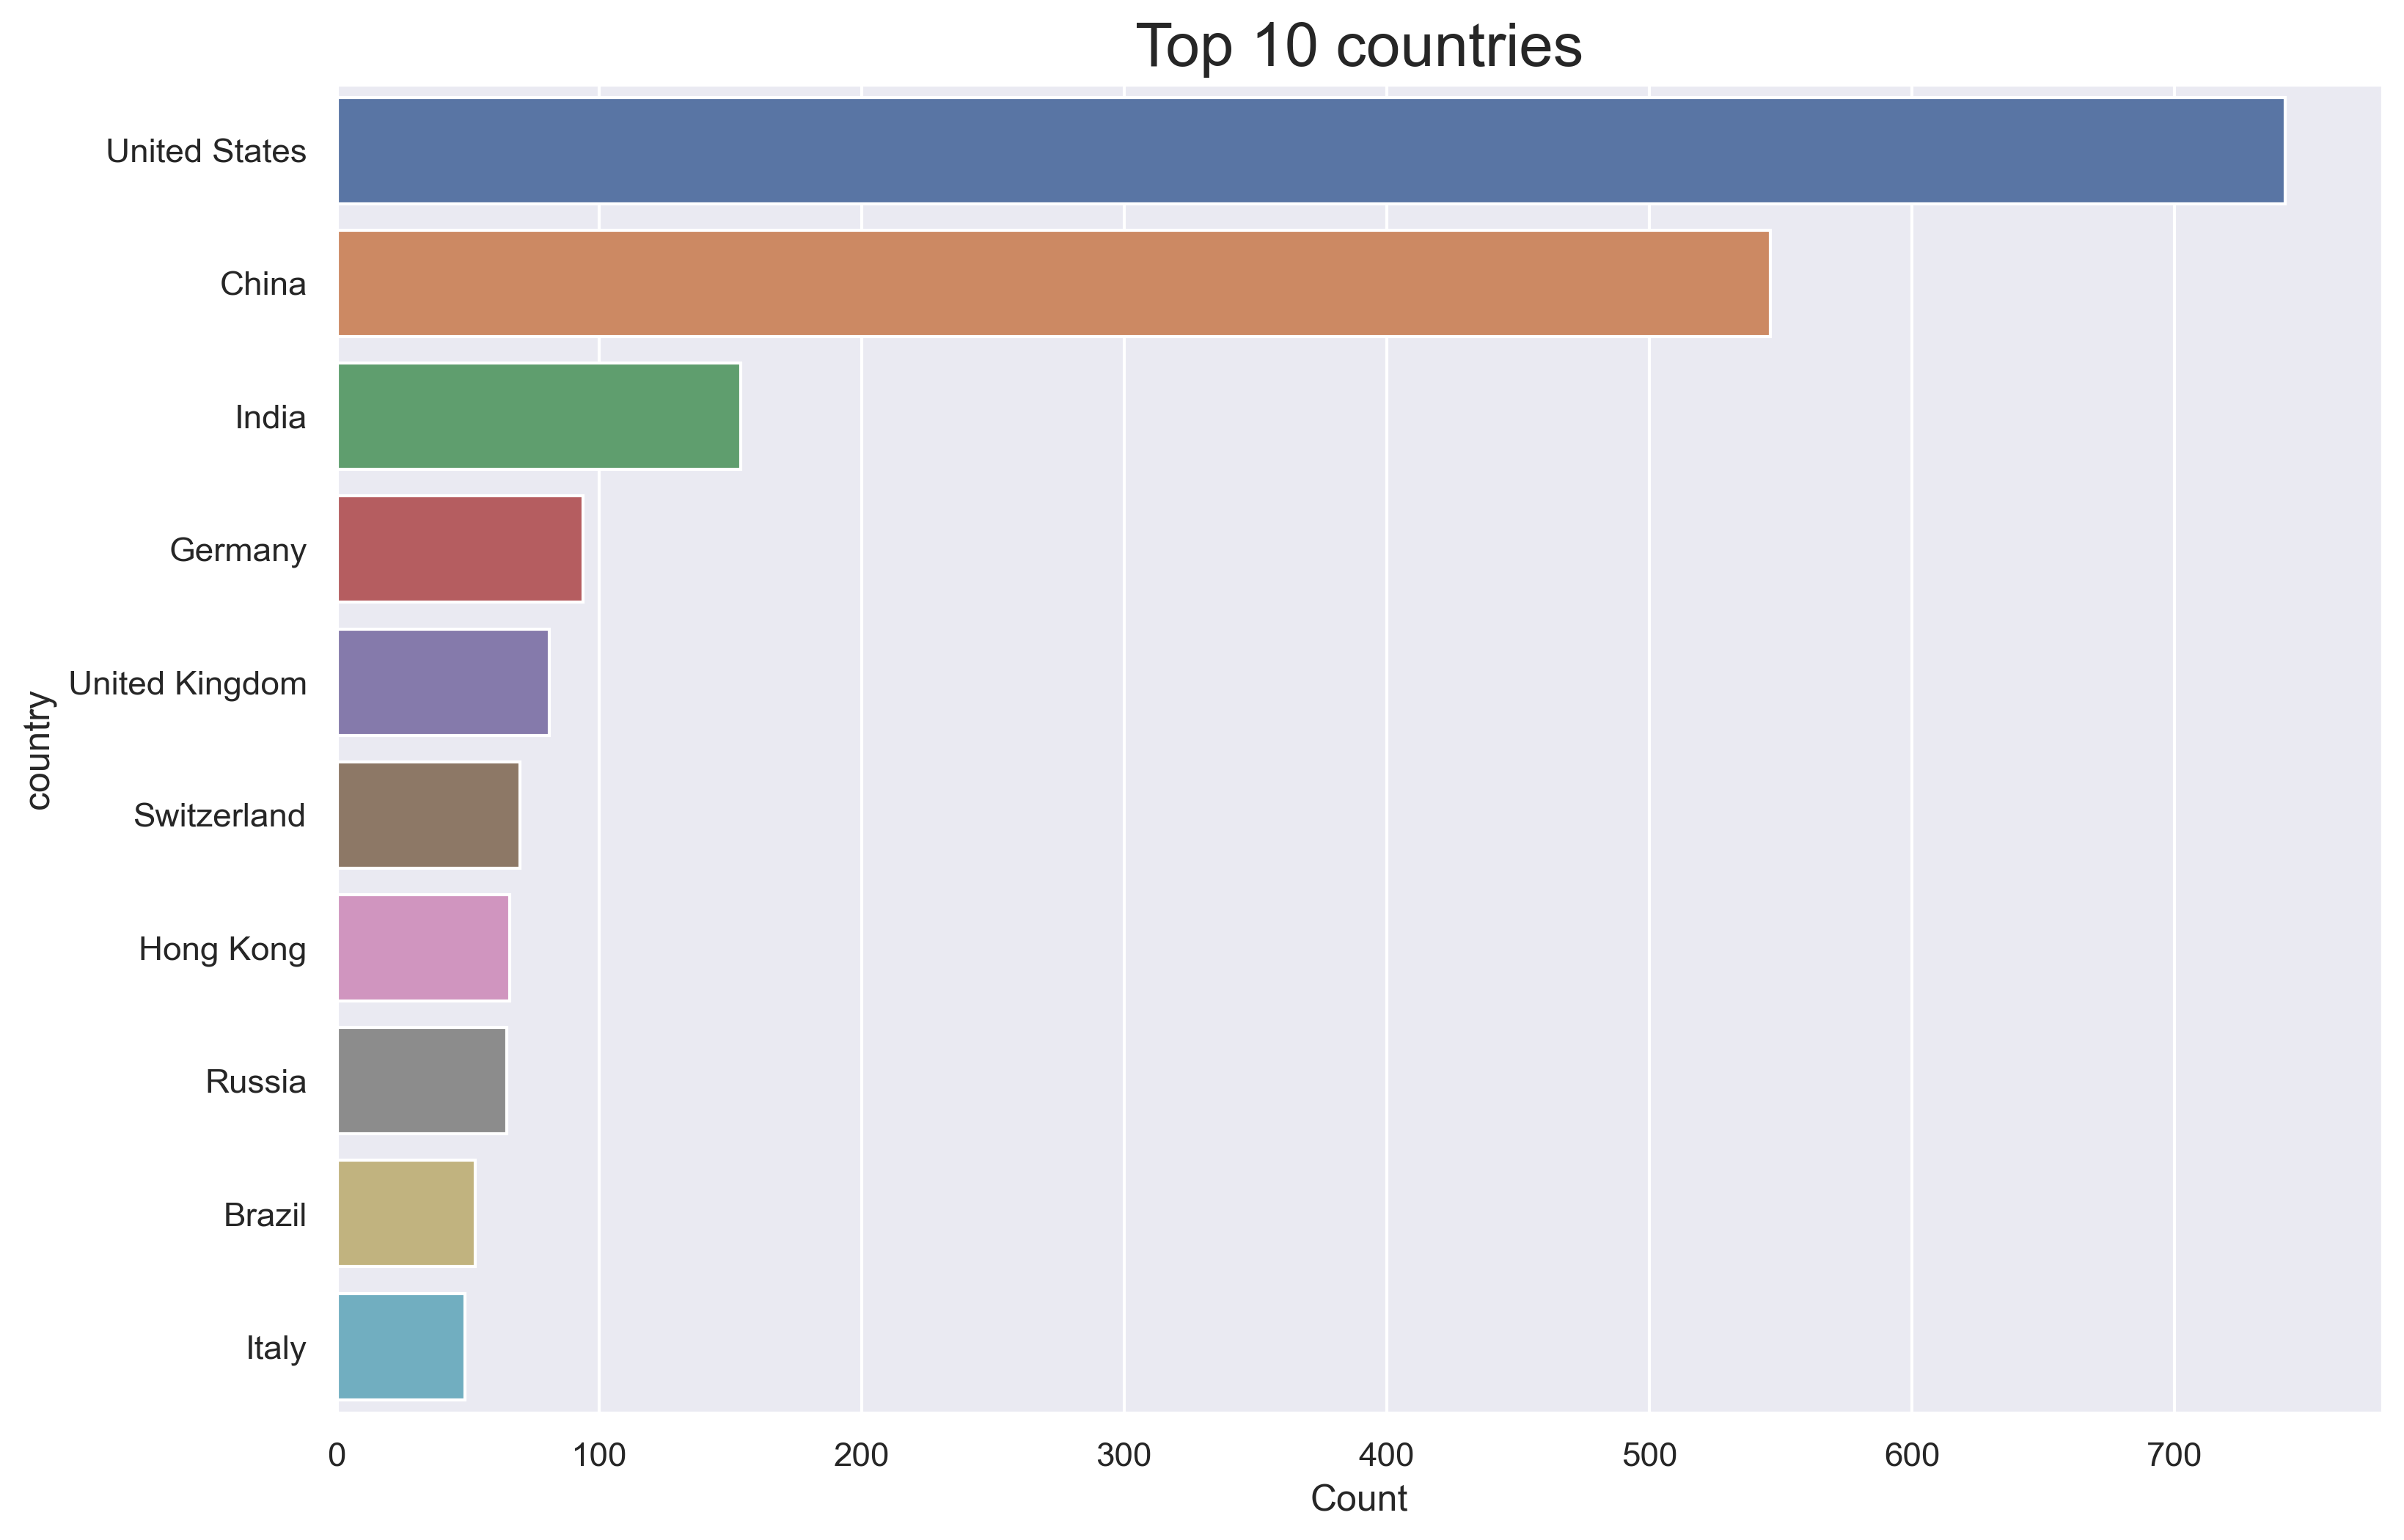

In [33]:
sns.barplot(bns_country_count["Count"][:10], bns_country_count.index[:10])
plt.title('Top 10 countries', fontsize = 20)

### Top 10 categories

In [34]:
bns["category"].unique()

array(['Automotive', 'Technology', 'Fashion & Retail',
       'Finance & Investments', 'Diversified', 'Media & Entertainment',
       'Telecom', 'Food & Beverage', 'Logistics', 'Real Estate',
       'Metals & Mining', 'Manufacturing', 'Gambling & Casinos',
       'Healthcare', 'Service', 'Energy', 'Construction & Engineering',
       'Sports'], dtype=object)

Let me remove spaces from the columns and replace & with _ with the replace method.

In [35]:
bns["category"]=bns["category"].apply(lambda x:x.replace(" ","")).apply(lambda x:x.replace("&","_"))

Let's find the number of categories. To do this, I'm going to first use the groupby method and then the size method

In [36]:
bns_category = bns.groupby("category").size().sort_values(ascending = False)
bns_category.head()

category
Finance_Investments    381
Technology             332
Manufacturing          319
Fashion_Retail         238
Healthcare             209
dtype: int64

In [37]:
bns_category= bns_category.to_frame()
bns_category.head()

,0
category,
Finance_Investments,381
Technology,332
Manufacturing,319
Fashion_Retail,238
Healthcare,209


#### Renaming the columns 
Let's name the first column with the rename method and sort the values by the number of categories with the sort_values method

In [38]:
bns_category=bns_category.rename(columns = {0:"Count"}).sort_values(by = "Count", ascending=False)
bns_category.head()

,Count
category,
Finance_Investments,381
Technology,332
Manufacturing,319
Fashion_Retail,238
Healthcare,209


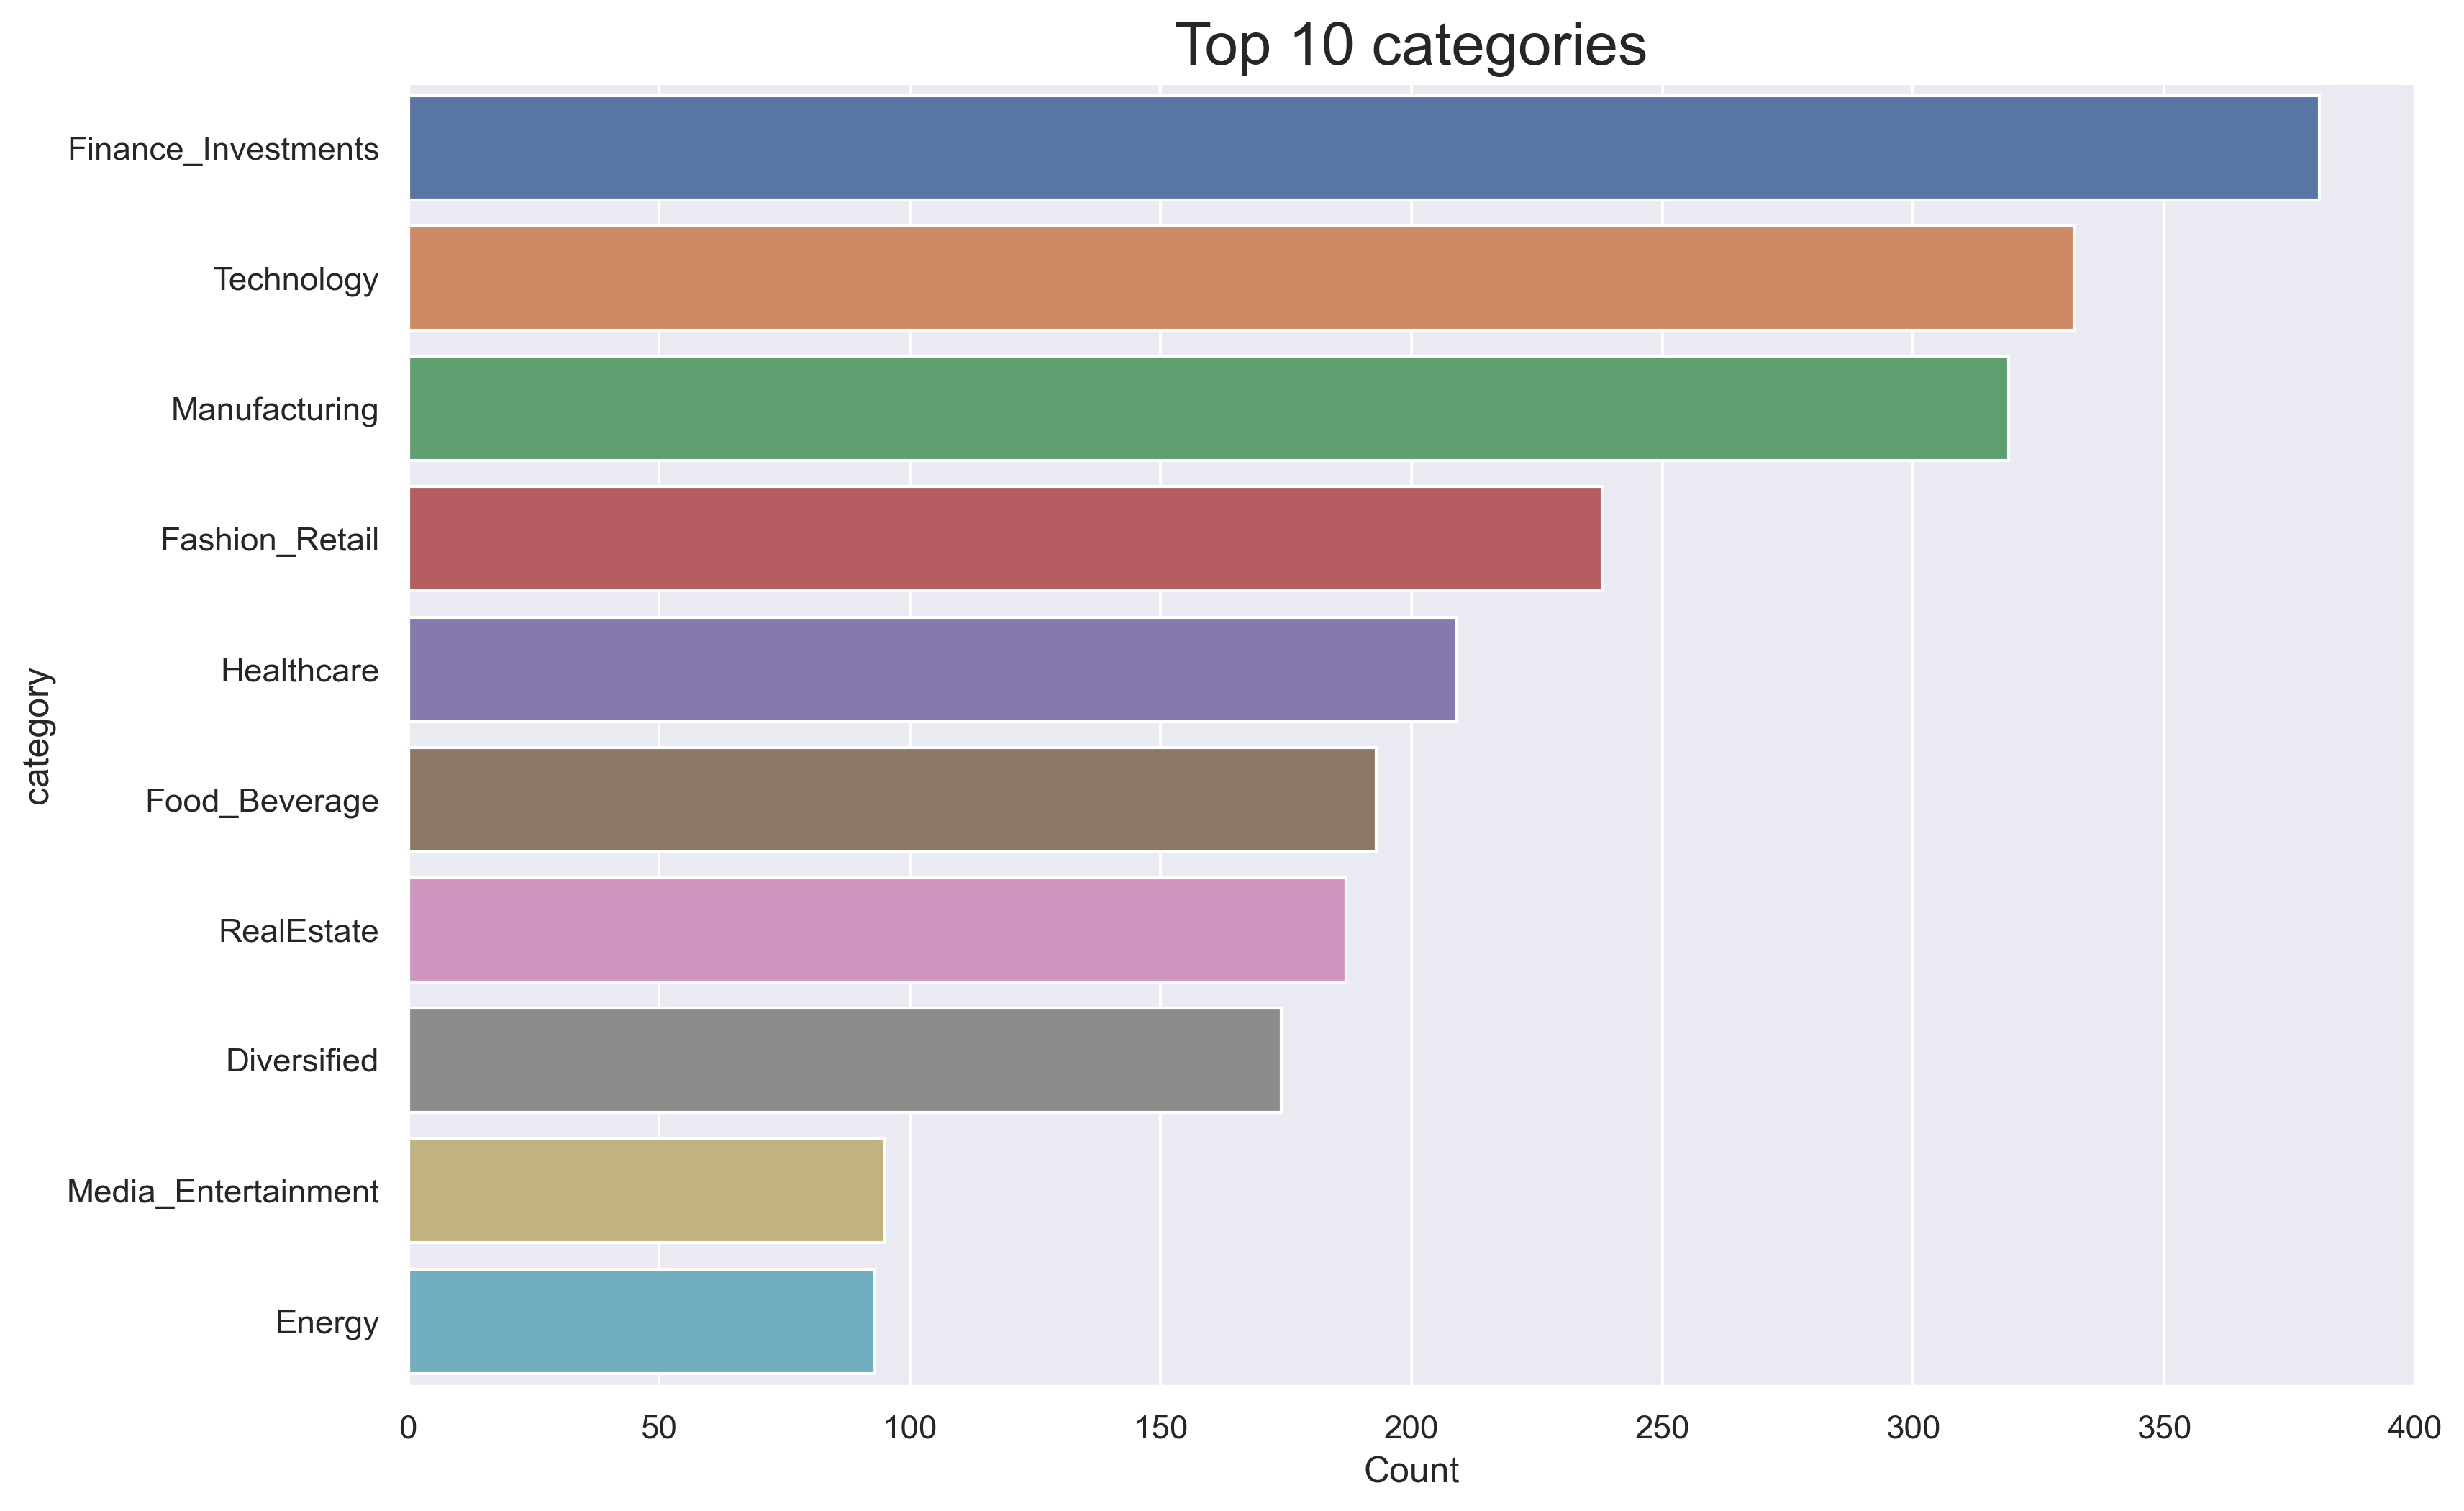

In [39]:
sns.barplot(bns_category["Count"][:10], bns_category.index[:10])
plt.title('Top 10 categories', fontsize = 20)
plt.show()

### The relationship between Money and Age 

We will use a scatter plot to investigate the relationship between how rich a person is and their age

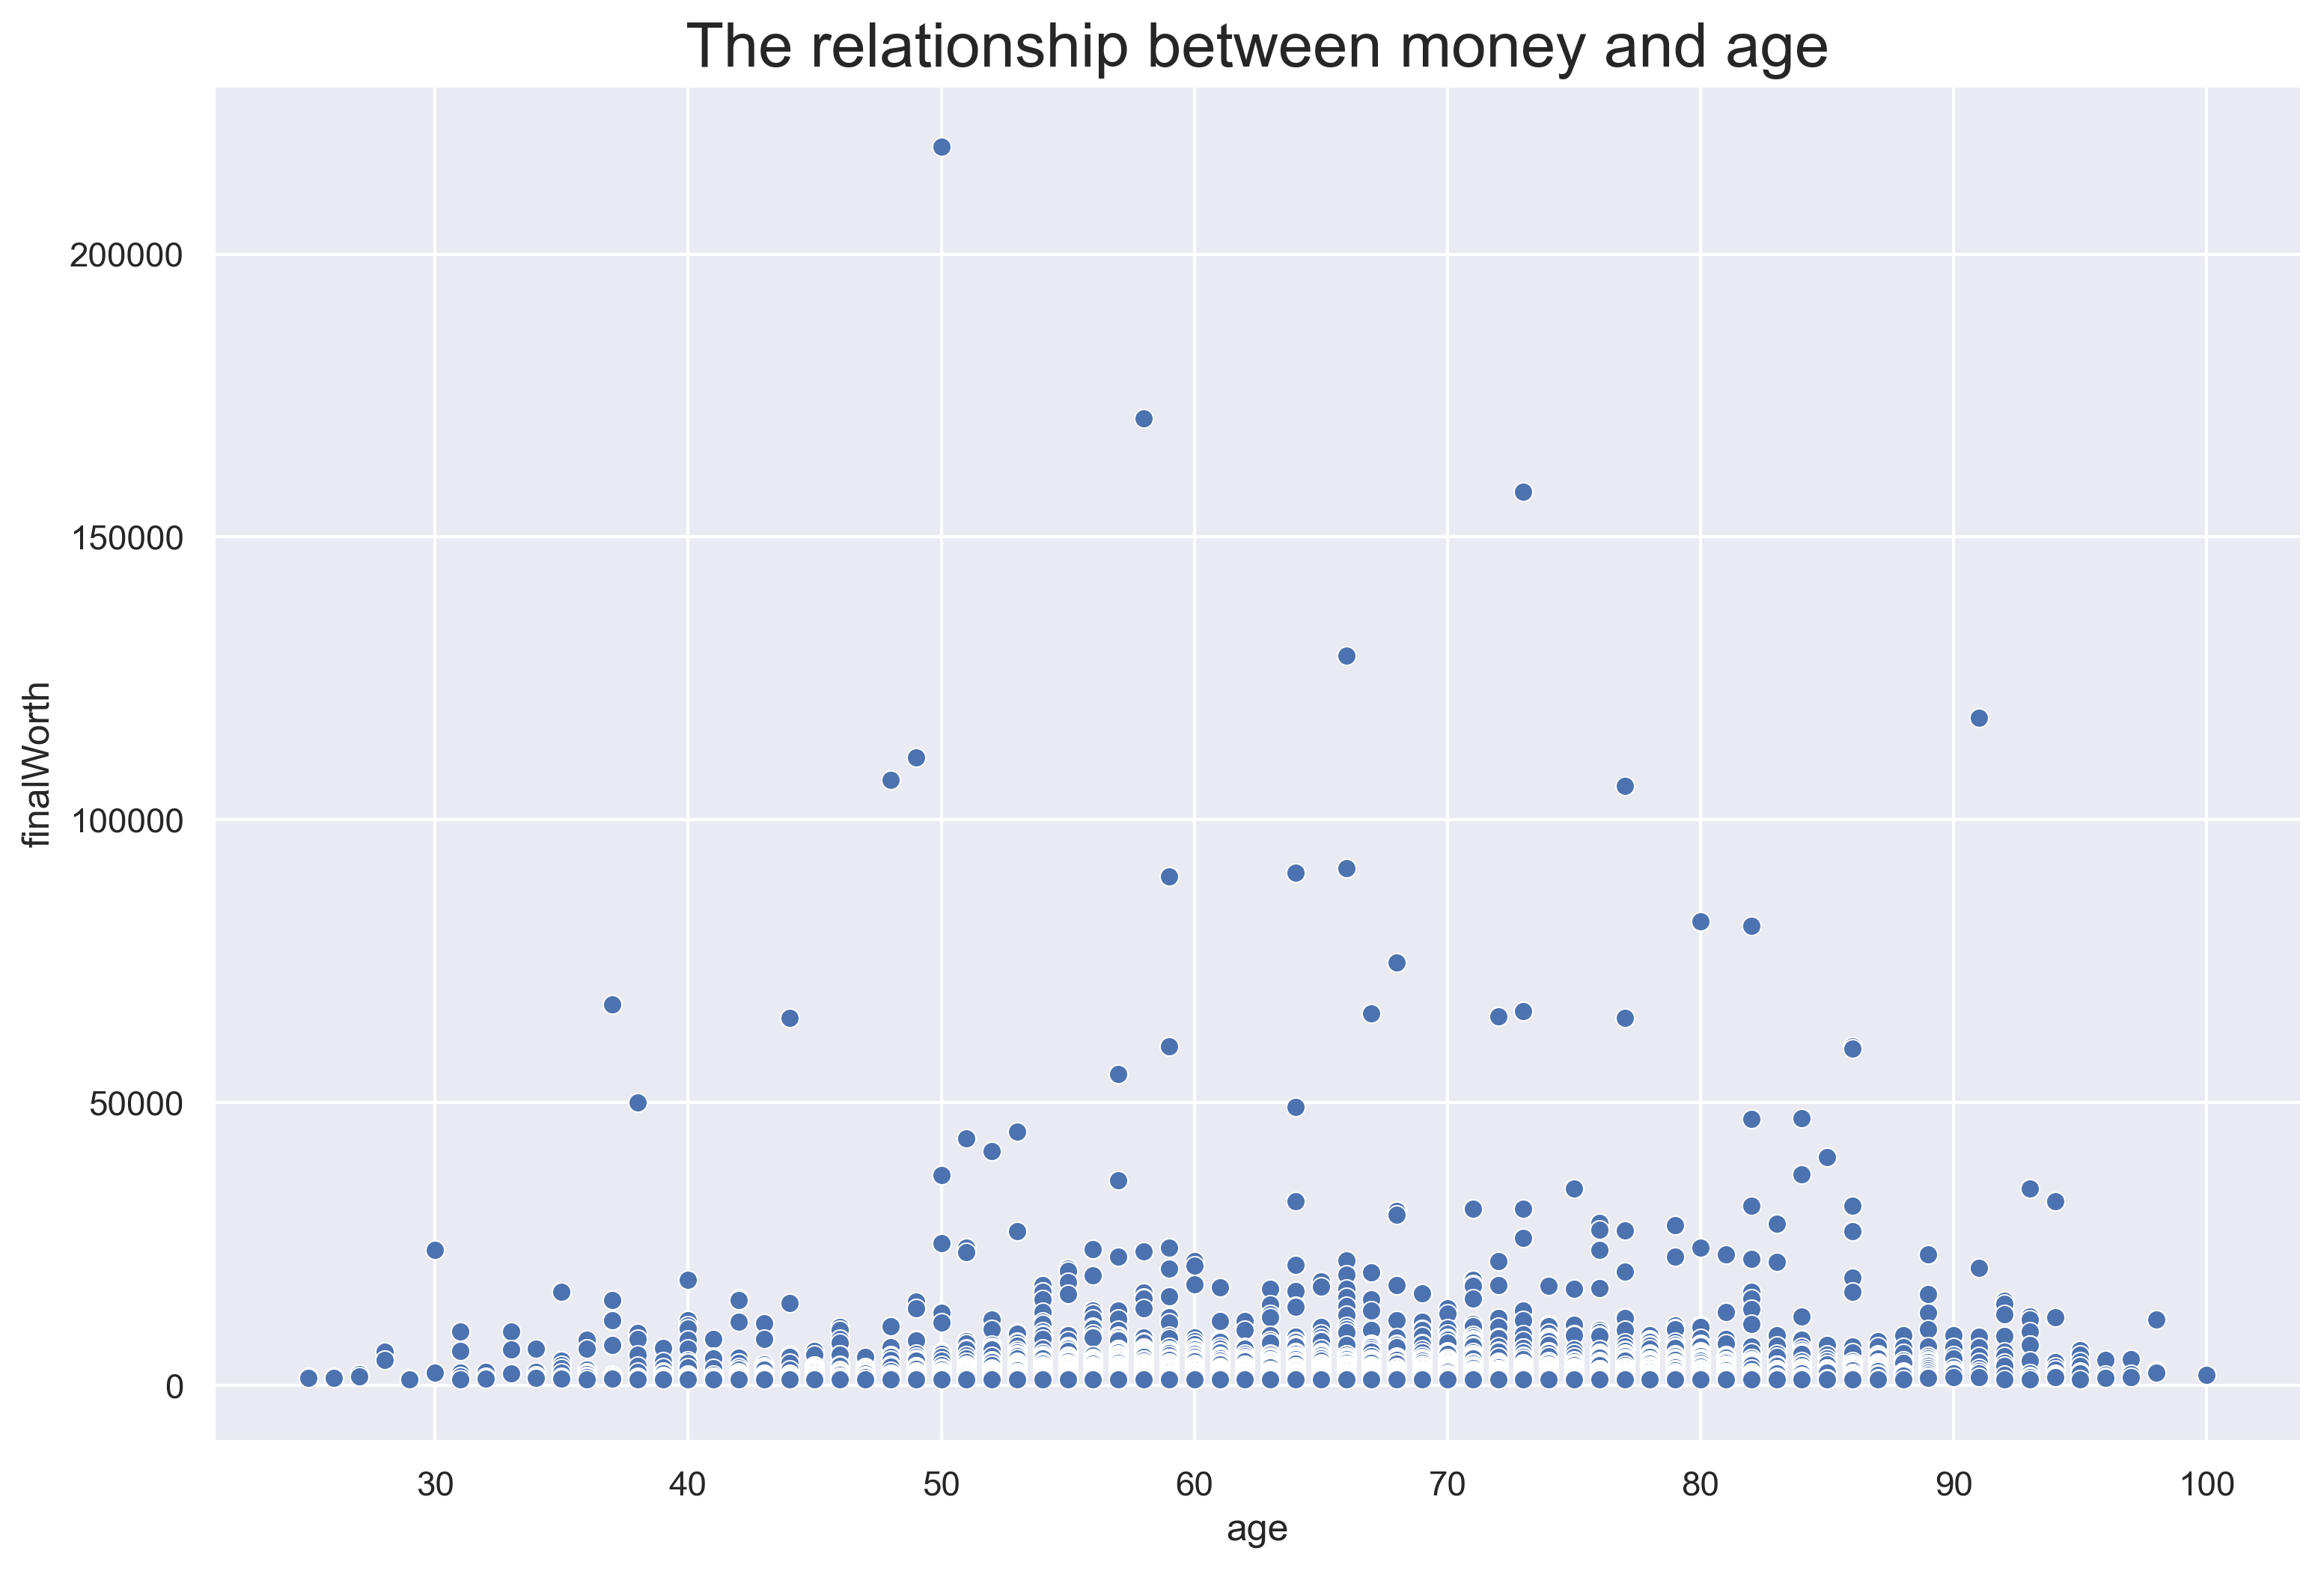

In [40]:
sns.scatterplot(bns["age"], bns["finalWorth"])
plt.title('The relationship between money and age', fontsize = 20)
plt.show()

It can be noted there's much relationship between age and wealth

### The distribution of Age

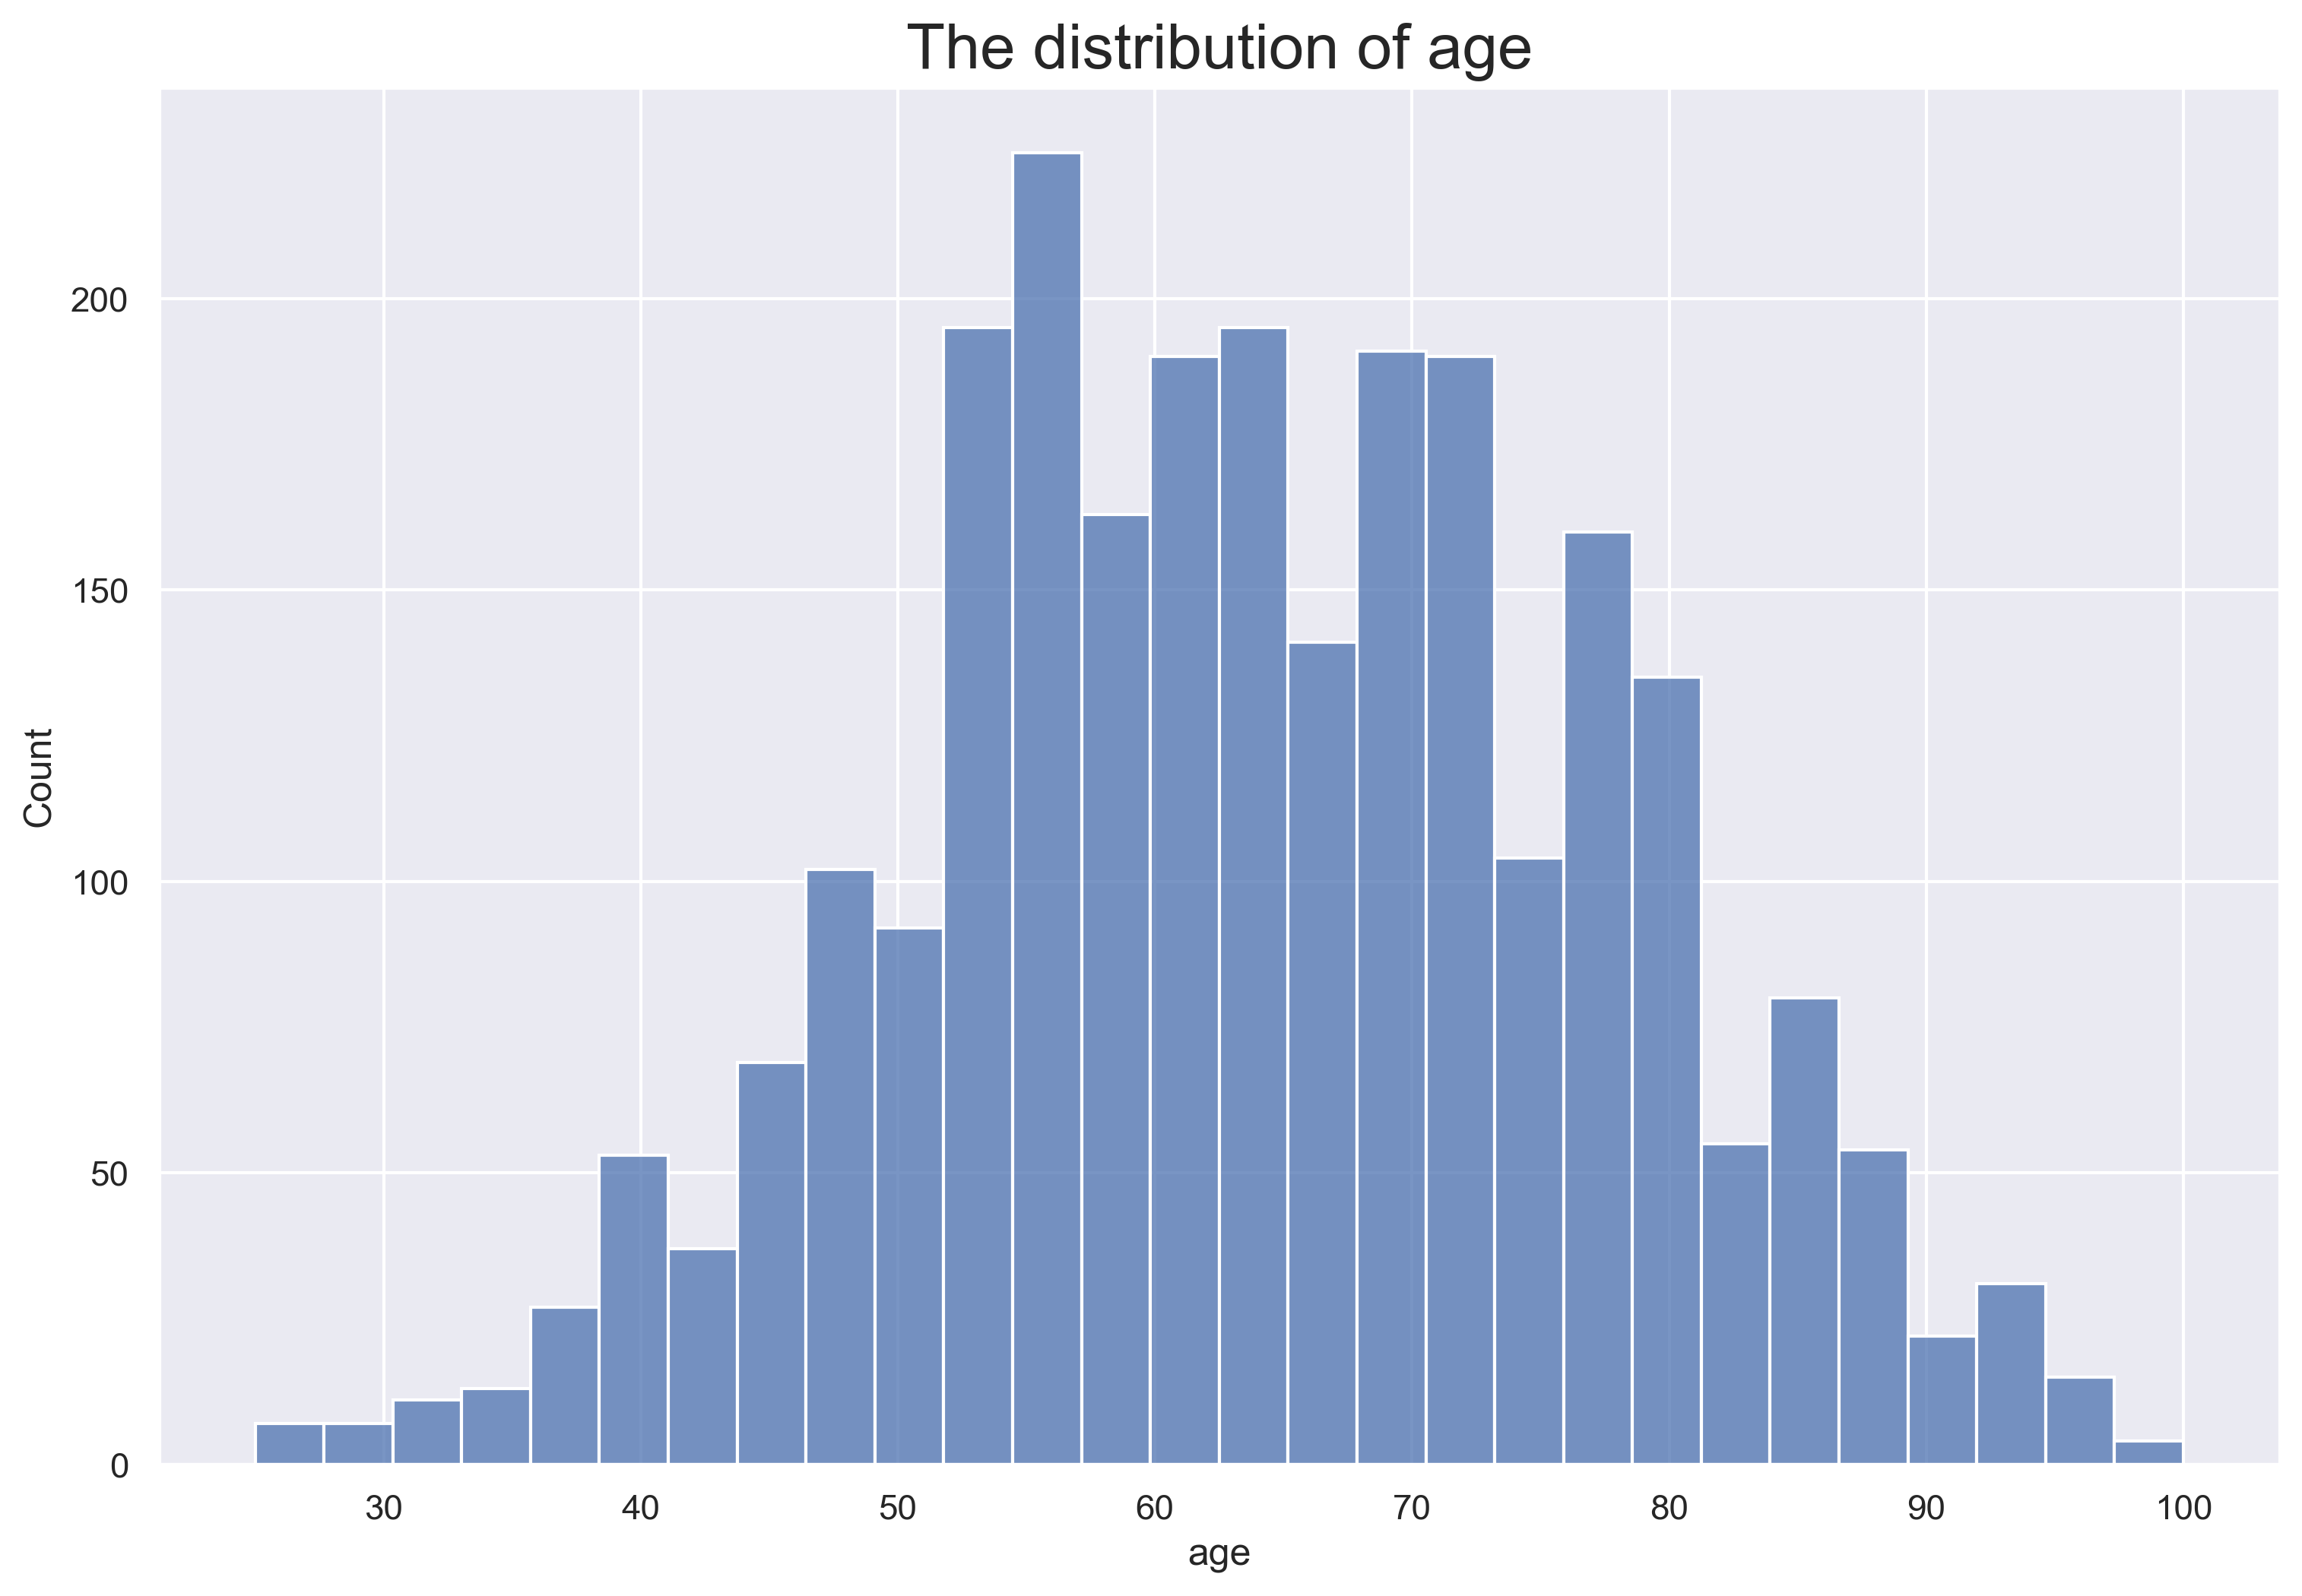

In [41]:
sns.histplot(bns["age"])
plt.title('The distribution of age', fontsize = 20)
plt.show()